In [93]:
from MFDFA import MFDFA

import pyedflib
import glob as gl
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter
import mne
import plotly.graph_objects as go
import pandas as pd

In [94]:
def estetica(figura,x_name = '',y_name = '',title = '',w = 400,h = 325):
    
    figura.update_xaxes(showgrid=True,showline=True, linewidth=2, linecolor='black', mirror=True,title = x_name)#'cccccccccccccccc')
    figura.update_yaxes(showgrid=True,showline=True, linewidth=2, linecolor='black', mirror=True,title =y_name)


    figura.update_layout(
        xaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
        margin=dict(l=20, r=20, t=40, b=20),
        plot_bgcolor="white",
        template="plotly_white", 
        title={
        'text': title,  # Título del gráfico
        'font': {'size': 24},  # Tamaño de fuente del título
        'pad': {'t': 100, 'b': 10, 'l': 50, 'r': 50}  # Márgenes del título
    },
        autosize=False,
        width=w,
        height=h,
        font= dict(family="Arial",size=18,color="Black"),
        #yaxis = dict(range=[0,1]),
        #xaxis = dict(range=[0,1]),
        title_font = dict(size =20),
        legend=dict(orientation = 'h',
                    font = dict(size = 15),
                     yanchor="top",
                     y=-0.2,
                     xanchor="left",
                     x=0.2,
                     bgcolor='rgba(255,255,255,0)',
                   )
    )
    
    

def filtroFIR(sig, fp = 0, fl=30):
    
    import mne
    import numpy as np
    sfreq = 256
    f_p = fp
    f_l = fl
    transition_band = 0.25 * f_p
    f_s = f_p + transition_band
    
    if f_l == 0:
        h = mne.filter.create_filter(sig, sfreq, l_freq=None, h_freq=f_p,
                                    fir_design='firwin2', verbose=True)  
    else:
         h = mne.filter.create_filter(sig, sfreq, l_freq=f_l, h_freq=f_p,
                                    fir_design='firwin2', verbose=True)
    sig_filtrada = np.convolve(h, sig)[len(h) // 2:]
    return sig_filtrada
    

def leer_con_protocolo_monopolar(sample_dir,fp,fl):
    import pyedflib 
    
    f = pyedflib.EdfReader(sample_dir )
    signal_labels = f.getSignalLabels()
    evento = np.zeros((3, f.getNSamples()[0]))
    n_canales = 21
    if fl== 0:
        sigbufs = np.zeros((22, f.getNSamples()[0]+113))
    else:
        sigbufs = np.zeros((22, f.getNSamples()[0]+3379))   
    
    for i in range(21):
        sigbufs[i, :] = filtroFIR(f.readSignal(i),fp,fl) #Fp1-F3
    evento[1, :] = f.readSignal(30)
    evento[2, :] = f.readSignal(31)

    return n_canales, signal_labels,evento, sigbufs


def Hv_a_df(signals, etiquetas):
    import pandas as pd
    import numpy as np
    
    
    df = pd.DataFrame()
    canal =0 
    for canal in range(20):
        df[etiquetas[canal]] = signals[canal]
      
    return df           
 

In [95]:
import glob as gl

ventana = 100
salto = 1
lag = np.unique(np.logspace(6, 10, 11, base = 2).astype(int))
q = 2
order = 1


fp = 30
fl = 0

Con = gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Epilepticos\*")
Sin =   gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Neurotipicos\*")

paciente = 0

n_canales, signal_labels, eventoC,Con_Epilepcia= leer_con_protocolo_monopolar(Con[paciente],fp,fl)
n_canales, signal_labels, eventoS, Sin_Epilepcia= leer_con_protocolo_monopolar(Sin[paciente],fp,fl)




In [96]:


df_Epilepticos = Hv_a_df(Con_Epilepcia,signal_labels)
df_Neurotipicos = Hv_a_df(Sin_Epilepcia,signal_labels)

corr_matrixE = df_Epilepticos.corr()
corr_matrixN = df_Neurotipicos.corr()

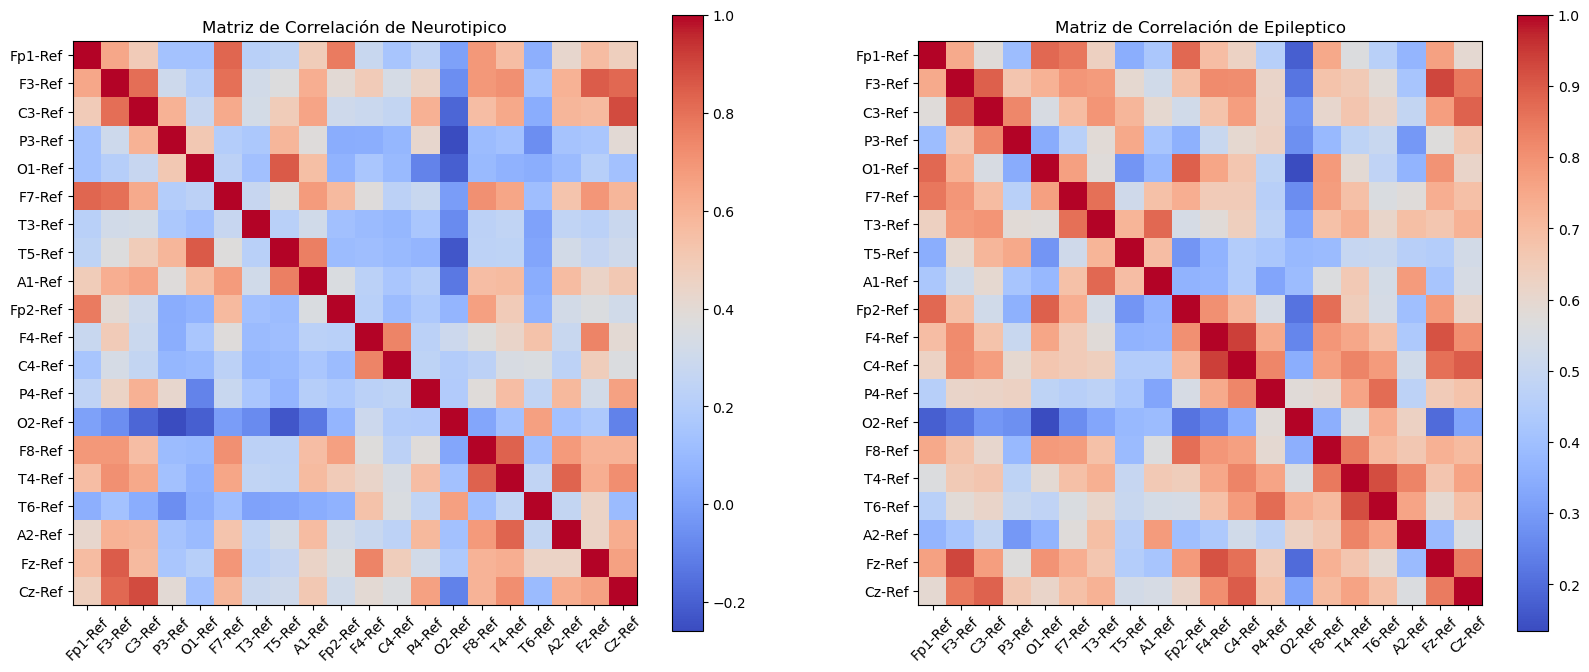

In [97]:




plt.figure(figsize=(20, 8))


plt.subplot(1,2,1)
plt.imshow(corr_matrixN, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns)
plt.title('Matriz de Correlación de Neurotipico')

plt.subplot(1,2,2)
plt.imshow(corr_matrixE, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns)
plt.title('Matriz de Correlación de Epileptico')

plt.show()




In [98]:
nodes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

df_Epilepticos = Hv_a_df(Con_Epilepcia,nodes)
df_Neurotipicos = Hv_a_df(Sin_Epilepcia,nodes)

corr_matrixE = df_Epilepticos.corr()
corr_matrixN = df_Neurotipicos.corr()

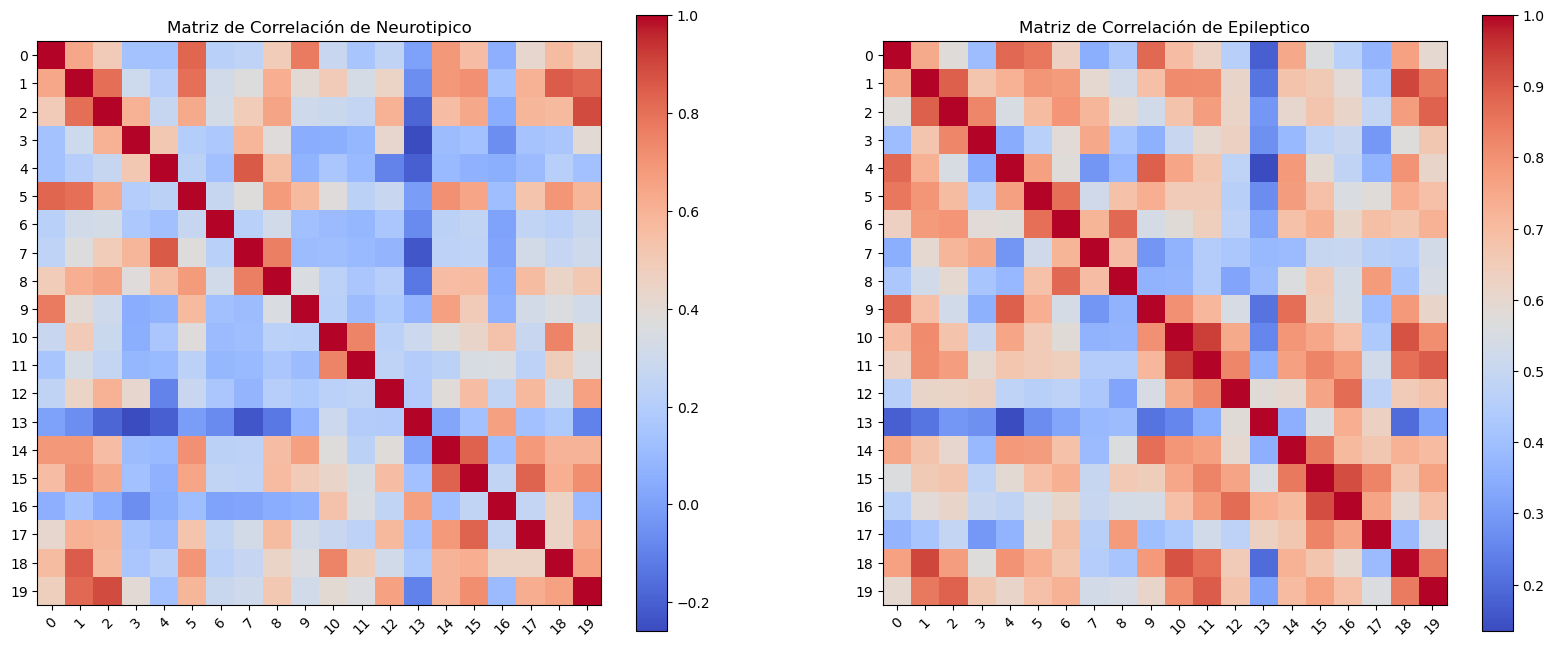

In [99]:
plt.figure(figsize=(20, 8))


plt.subplot(1,2,1)
plt.imshow(corr_matrixN, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns)
plt.title('Matriz de Correlación de Neurotipico')

plt.subplot(1,2,2)
plt.imshow(corr_matrixE, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns)
plt.title('Matriz de Correlación de Epileptico')

plt.show()


c:\Users\valen\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

c:\Users\valen\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



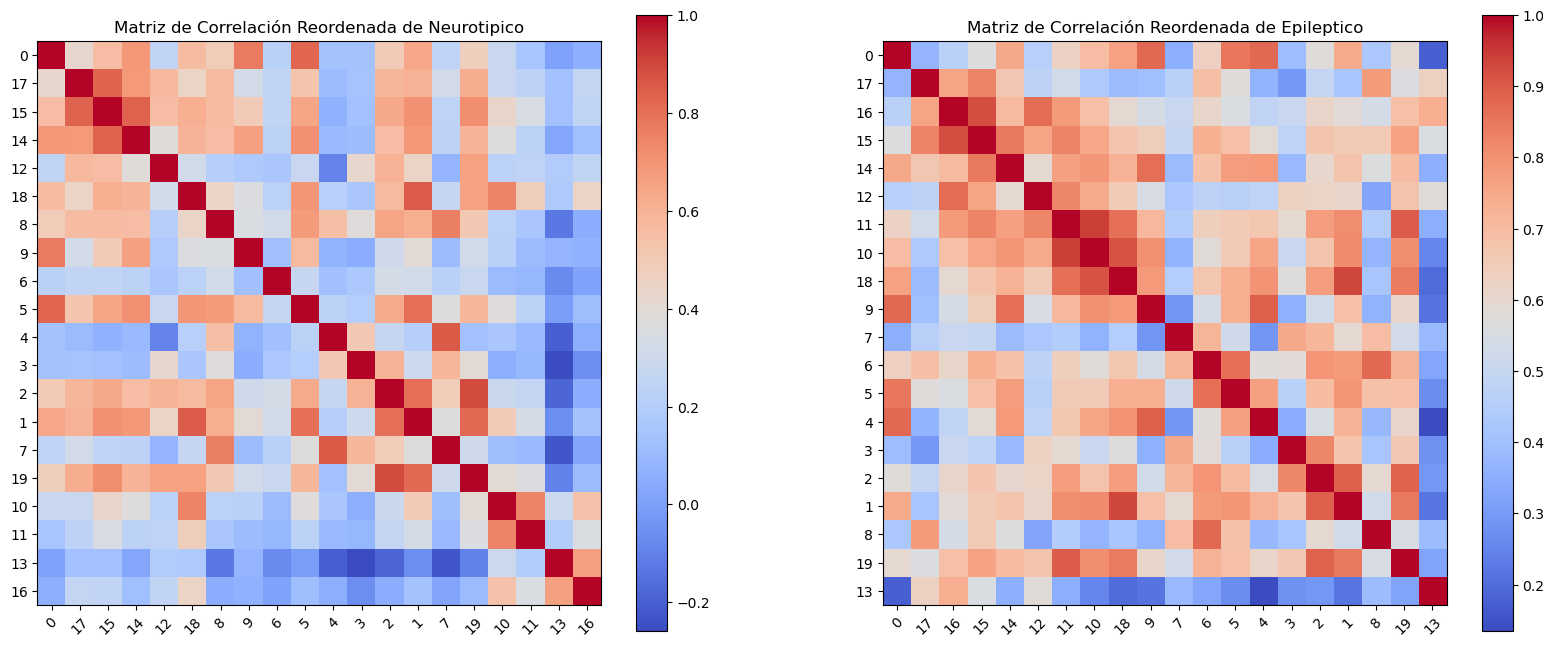

In [100]:
from scipy.spatial.distance import squareform
from sklearn.cluster import AgglomerativeClustering


distance_matrix = 1 - np.abs(corr_matrixE)
distance_vector = squareform(distance_matrix)
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(distance_matrix)
cluster_indices = np.argsort(cluster_labels)
reordered_matrixE = corr_matrixE.iloc[cluster_indices, :]
reordered_matrixE= reordered_matrixE.iloc[:, cluster_indices]


distance_matrix = 1 - np.abs(corr_matrixN)
distance_vector = squareform(distance_matrix)
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(distance_matrix)
cluster_indices = np.argsort(cluster_labels)
reordered_matrixN = corr_matrixN.iloc[cluster_indices, :]
reordered_matrixN= reordered_matrixN.iloc[:, cluster_indices]


plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.imshow(reordered_matrixN, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(reordered_matrixN.columns)), reordered_matrixN.columns, rotation=45)
plt.yticks(np.arange(len(reordered_matrixN.columns)), reordered_matrixN.columns)
plt.title('Matriz de Correlación Reordenada de Neurotipico')


plt.subplot(1,2,2)
plt.imshow(reordered_matrixE, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(reordered_matrixE.columns)), reordered_matrixE.columns, rotation=45)
plt.yticks(np.arange(len(reordered_matrixE.columns)), reordered_matrixE.columns)
plt.title('Matriz de Correlación Reordenada de Epileptico')

plt.show()




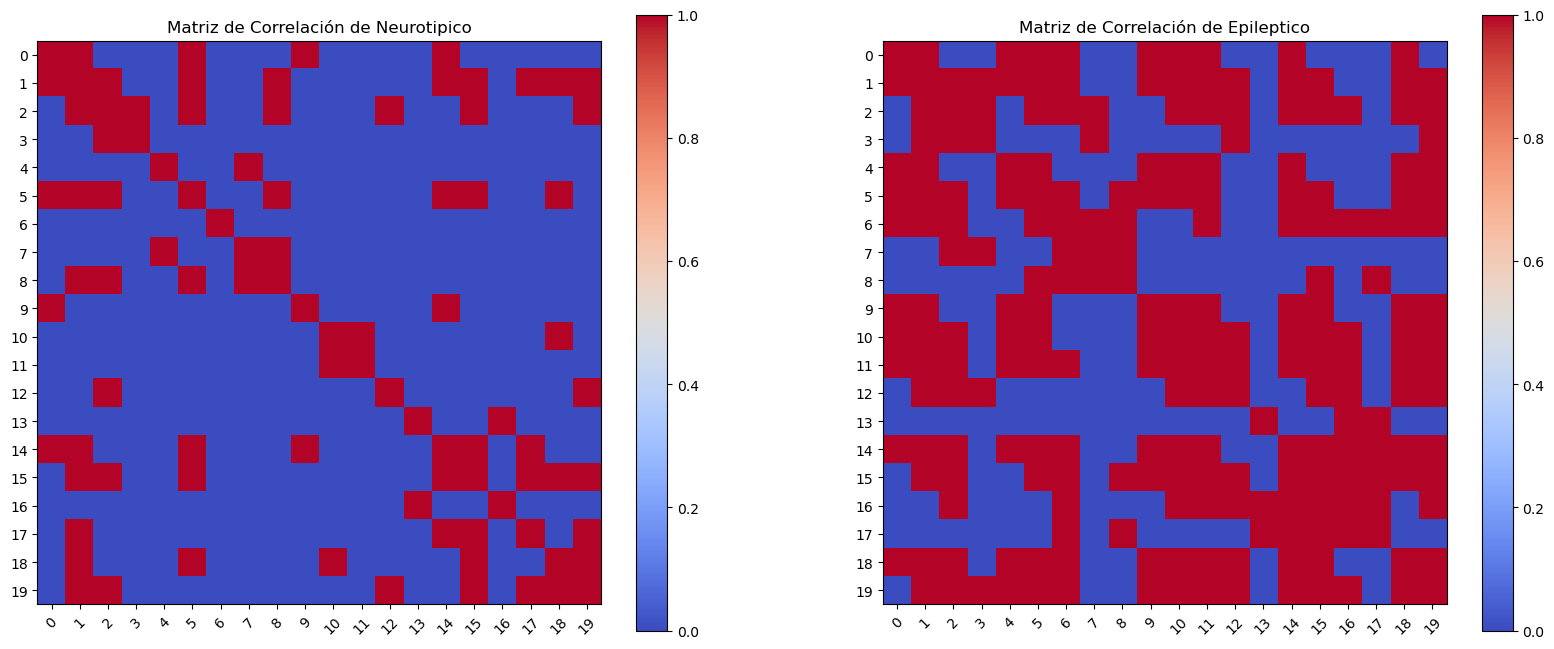

In [101]:
beta = 0.6
corr_matrixE_Binarizada = corr_matrixE.copy()


for i in range(len(corr_matrixE[:][1])):
    for j in range(len(corr_matrixE[1][:])):
        if corr_matrixE[i][j] > beta:
            corr_matrixE_Binarizada[i][j] = 1
        else:
            corr_matrixE_Binarizada[i][j] = 0
        
        

corr_matrixN_Binarizada = corr_matrixN.copy()


for i in range(len(corr_matrixN[:][1])):
    for j in range(len(corr_matrixE[1][:])):
        if corr_matrixN[i][j] > beta:
            corr_matrixN_Binarizada[i][j] = 1
        else:
            corr_matrixN_Binarizada[i][j] = 0
            


plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.imshow(corr_matrixN_Binarizada, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns)
plt.title('Matriz de Correlación de Neurotipico')


plt.subplot(1,2,2)
plt.imshow(corr_matrixE_Binarizada, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns)
plt.title('Matriz de Correlación de Epileptico')


plt.show()




In [102]:
corr_matrixN

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.637081,0.491001,0.142634,0.143364,0.825668,0.220246,0.239006,0.487260,0.773443,0.281343,0.157821,0.246700,0.005102,0.687714,0.554257,0.060768,0.423298,0.561287,0.469536
1,0.637081,1.000000,0.808226,0.298520,0.204570,0.799580,0.317889,0.368048,0.614384,0.398420,0.493492,0.334299,0.445049,-0.060045,0.687438,0.712542,0.140213,0.601387,0.848271,0.822946
2,0.491001,0.808226,1.000000,0.601071,0.276329,0.626628,0.330310,0.484493,0.646554,0.305645,0.290728,0.260777,0.604265,-0.182098,0.553640,0.631427,0.049212,0.585538,0.569422,0.891442
3,0.142634,0.298520,0.601071,1.000000,0.505884,0.200302,0.170102,0.584902,0.376596,0.047896,0.056100,0.086111,0.421172,-0.258458,0.114286,0.135196,-0.056943,0.145707,0.164012,0.396998
4,0.143364,0.204570,0.276329,0.505884,1.000000,0.230572,0.132121,0.854693,0.548979,0.074884,0.159688,0.105184,-0.092354,-0.200997,0.100531,0.066271,0.054629,0.110135,0.211469,0.135566
5,0.825668,0.799580,0.626628,0.200302,0.230572,1.000000,0.274388,0.375090,0.679712,0.571087,0.379908,0.229430,0.280645,-0.009146,0.711183,0.645644,0.121093,0.526957,0.694717,0.582393
6,0.220246,0.317889,0.330310,0.170102,0.132121,0.274388,1.000000,0.223047,0.312494,0.130378,0.107156,0.086587,0.160018,-0.067492,0.228387,0.250577,0.007190,0.247935,0.227781,0.285404
7,0.239006,0.368048,0.484493,0.584902,0.854693,0.375090,0.223047,1.000000,0.761855,0.114624,0.123884,0.100557,0.082460,-0.226009,0.235182,0.239062,0.020542,0.323136,0.263176,0.302336
8,0.487260,0.614384,0.646554,0.376596,0.548979,0.679712,0.312494,0.761855,1.000000,0.351841,0.226684,0.161774,0.207000,-0.126025,0.552702,0.563129,0.049170,0.561095,0.444444,0.505875
9,0.773443,0.398420,0.305645,0.047896,0.074884,0.571087,0.130378,0.114624,0.351841,1.000000,0.220428,0.112358,0.178959,0.081921,0.663625,0.490869,0.068490,0.324344,0.360580,0.314524


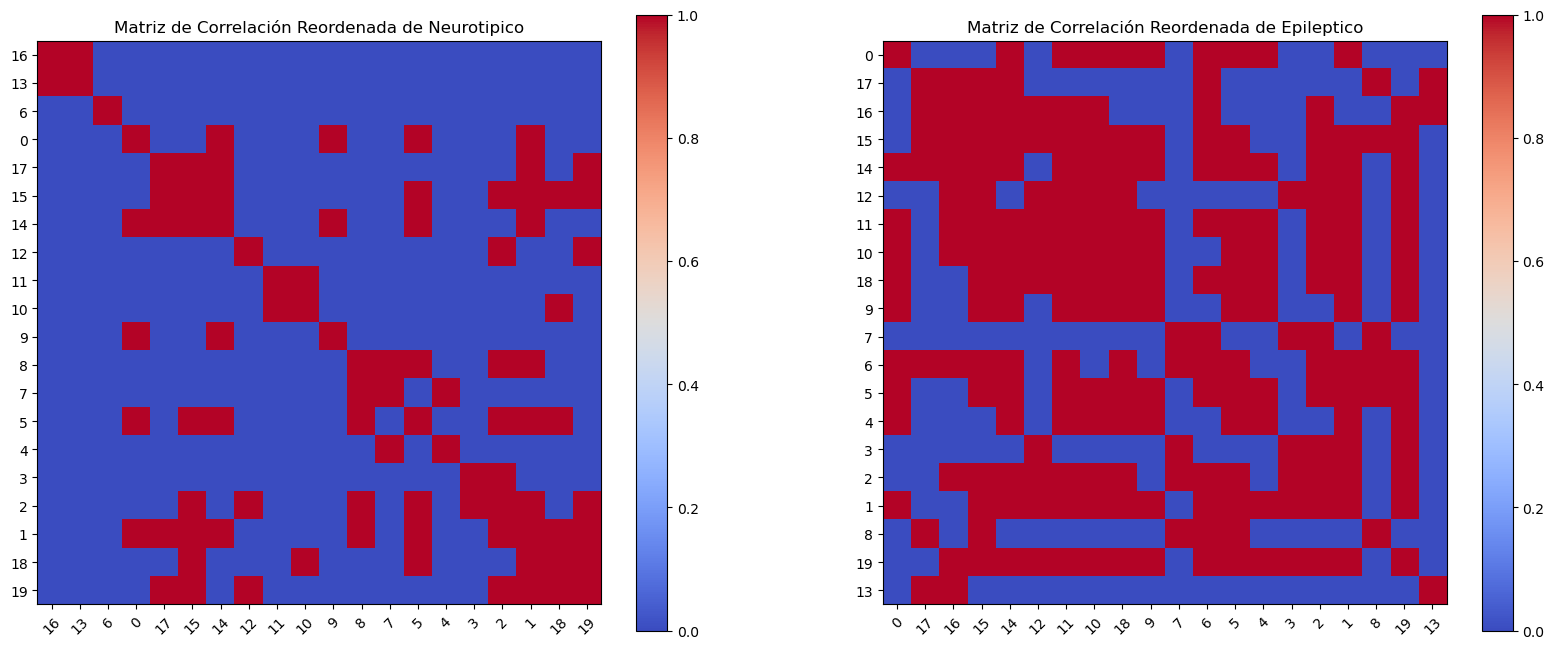

In [103]:


distance_matrix = 1 - np.abs(corr_matrixE_Binarizada)
distance_vector = squareform(distance_matrix)
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(distance_matrix)
cluster_indices = np.argsort(cluster_labels)
reordered_matrixE = corr_matrixE_Binarizada.iloc[cluster_indices, :]
reordered_matrixE= reordered_matrixE.iloc[:, cluster_indices]


distance_matrix = 1 - np.abs(corr_matrixN_Binarizada)
distance_vector = squareform(distance_matrix)
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(distance_matrix)
cluster_indices = np.argsort(cluster_labels)
reordered_matrixN = corr_matrixN_Binarizada.iloc[cluster_indices, :]
reordered_matrixN= reordered_matrixN.iloc[:, cluster_indices]


plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.imshow(reordered_matrixN, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(reordered_matrixN.columns)), reordered_matrixN.columns, rotation=45)
plt.yticks(np.arange(len(reordered_matrixN.columns)), reordered_matrixN.columns)
plt.title('Matriz de Correlación Reordenada de Neurotipico')


plt.subplot(1,2,2)
plt.imshow(reordered_matrixE, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(reordered_matrixE.columns)), reordered_matrixE.columns, rotation=45)
plt.yticks(np.arange(len(reordered_matrixE.columns)), reordered_matrixE.columns)
plt.title('Matriz de Correlación Reordenada de Epileptico')

plt.show()

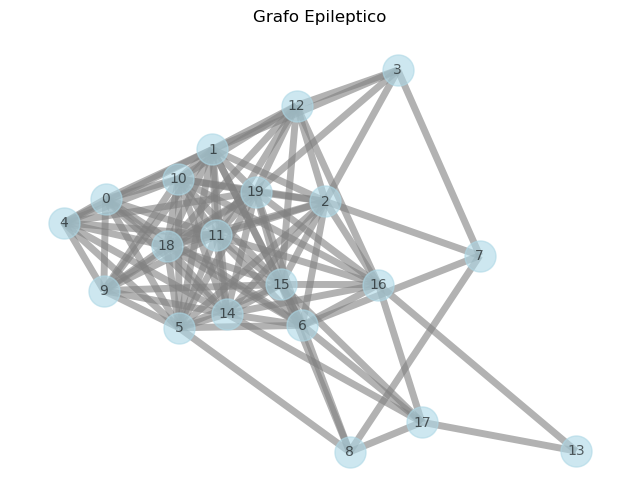

In [104]:
import pandas as pd
import numpy as np
import networkx as nx

graph = nx.Graph()


for node in corr_matrixE_Binarizada.columns:
    graph.add_node(node)
    
for i, node1 in enumerate(corr_matrixE_Binarizada.columns):
    for j, node2 in enumerate(corr_matrixE_Binarizada.columns):
        if i != j and corr_matrixE_Binarizada[i][j] == 1.0:
            graph.add_edge(node1, node2)


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, with_labels=True, node_size=500, node_color='lightblue',
                 font_size=10, font_color='black', edge_color='gray', width=5, alpha=0.6)
labels = nx.get_edge_attributes(graph, 'weight')

plt.title('Grafo Epileptico')
plt.axis('off')
plt.show()


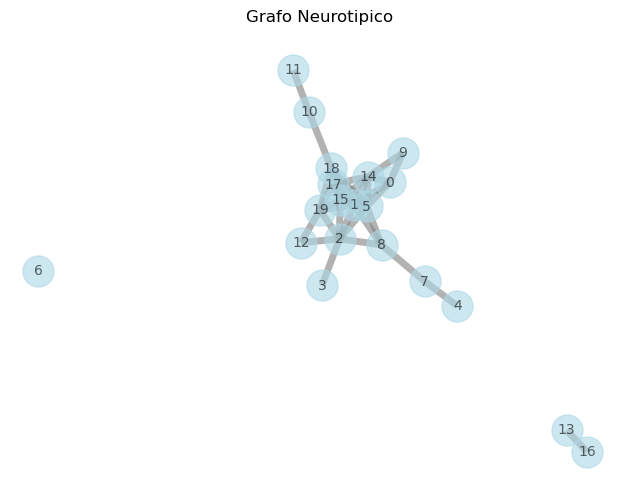

In [105]:
import pandas as pd
import numpy as np
import networkx as nx

graphSolo = nx.Graph()


for node in corr_matrixN_Binarizada.columns:
    graphSolo.add_node(node)
    
for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
    for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
        if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
            graphSolo.add_edge(node1, node2)


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graphSolo)
nx.draw_networkx(graphSolo, pos, with_labels=True, node_size=500, node_color='lightblue',
                 font_size=10, font_color='black', edge_color='gray', width=5, alpha=0.6)
labels = nx.get_edge_attributes(graphSolo, 'weight')

plt.title('Grafo Neurotipico')
plt.axis('off')
plt.show()


In [106]:
corr_matrixN_Binarizada

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


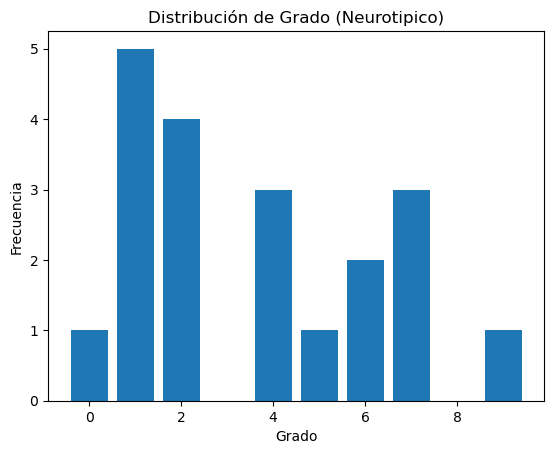

In [107]:

degree_sequence = [graph.degree(node) for node in graphSolo.nodes()]

degree_counts = nx.degree_histogram(graphSolo)


x = range(len(degree_counts))

plt.bar(x, degree_counts)
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Distribución de Grado (Neurotipico)')
plt.show()

# Variar la distribucion de grado
# Coficienciente de clustering
# Longitud de camino mas corto
# Longitud de la red
# Grado Promedio


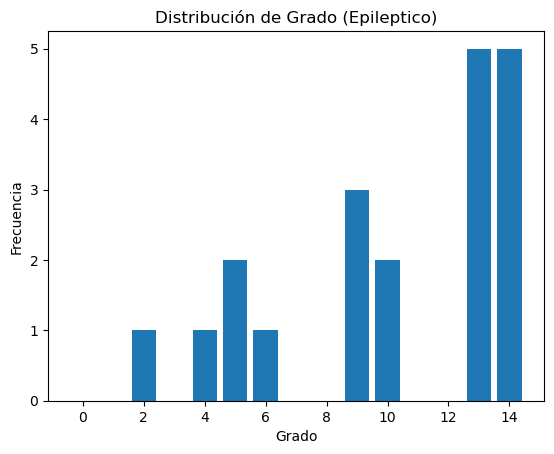

In [108]:

degree_sequence = [graph.degree(node) for node in graphSolo.nodes()]

degree_counts = nx.degree_histogram(graph)


x = range(len(degree_counts))

plt.bar(x, degree_counts)
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Distribución de Grado (Epileptico)')
plt.show()

# Variar la distribucion de grado
# Coficienciente de clustering
# Longitud de camino mas corto
# Longitud de la red
# Grado Promedio


In [109]:
grafo = graphSolo
coeficiente_clustering = nx.average_clustering(grafo)

# Calcular el coeficiente de clustering para nodos individuales
coeficientes_nodos = nx.clustering(grafo)
coeficiente_clustering



0.3781349206349206

In [139]:

componentes_conectados = list(nx.connected_components(grafo))


componente_mas_grande = max(componentes_conectados, key=len)

grafo_conectado = grafo.subgraph(componente_mas_grande)

longitud_red = nx.average_shortest_path_length(grafo_conectado)

longitud_red

2.4044117647058822

In [140]:
componentes_conectados 

[{0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 17, 18, 19}, {6}, {13, 16}]

In [111]:
grado_promedio = nx.average_degree_connectivity(grafo)

grado_promedio

{4: 6.416666666666667,
 9: 5.555555555555555,
 7: 5.809523809523809,
 1: 2.6,
 0: 0,
 2: 4.25,
 6: 5.583333333333333,
 5: 6.2}

In [112]:

import sys



ventana = 100
salto = 1
lag = np.unique(np.logspace(6, 10, 11, base = 2).astype(int))
q = 2
order = 1
matricesN = []
matricesE = []
beta = 0.6
fp = 30
fl = 0



Con = gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Epilepticos\*")
Sin =   gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Neurotipicos\*")

for t in range(6):
    paciente = t

    n_canales, signal_labels, eventoC,Con_Epilepcia= leer_con_protocolo_monopolar(Con[paciente],fp,fl)
    n_canales, signal_labels, eventoS, Sin_Epilepcia= leer_con_protocolo_monopolar(Sin[paciente],fp,fl)

    nodes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

    df_Epilepticos = Hv_a_df(Con_Epilepcia,nodes)
    df_Neurotipicos = Hv_a_df(Sin_Epilepcia,nodes)

    corr_matrixE = df_Epilepticos.corr()
    corr_matrixN = df_Neurotipicos.corr()

 
    corr_matrixE_Binarizada = corr_matrixE.copy()


    for i in range(len(corr_matrixE[:][1])):
        for j in range(len(corr_matrixE[1][:])):
            if corr_matrixE[i][j] > beta:
                corr_matrixE_Binarizada[i][j] = 1
            else:
                corr_matrixE_Binarizada[i][j] = 0
            
            
        

    corr_matrixN_Binarizada = corr_matrixN.copy()


    for i in range(len(corr_matrixN[:][1])):
        for j in range(len(corr_matrixE[1][:])):
            if corr_matrixN[i][j] > beta:
                corr_matrixN_Binarizada[i][j] = 1
            else:
                corr_matrixN_Binarizada[i][j] = 0
                
                
    distance_matrix = 1 - np.abs(corr_matrixE_Binarizada)
    distance_vector = squareform(distance_matrix)
    n_clusters = 2
    clustering = AgglomerativeClustering(n_clusters=n_clusters,metric='precomputed', linkage='average')
    cluster_labels = clustering.fit_predict(distance_matrix)
    cluster_indices = np.argsort(cluster_labels)
    reordered_matrixE = corr_matrixE_Binarizada.iloc[cluster_indices, :]
    reordered_matrixE= reordered_matrixE.iloc[:, cluster_indices]


    distance_matrix = 1 - np.abs(corr_matrixN_Binarizada)
    distance_vector = squareform(distance_matrix)
    n_clusters = 2
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average')
    cluster_labels = clustering.fit_predict(distance_matrix)
    cluster_indices = np.argsort(cluster_labels)
    reordered_matrixN = corr_matrixN_Binarizada.iloc[cluster_indices, :]
    reordered_matrixN= reordered_matrixN.iloc[:, cluster_indices]

    matricesN.append(corr_matrixN_Binarizada)
    matricesE.append(corr_matrixE_Binarizada)
    
    sys.stdout = sys.__stdout__

            

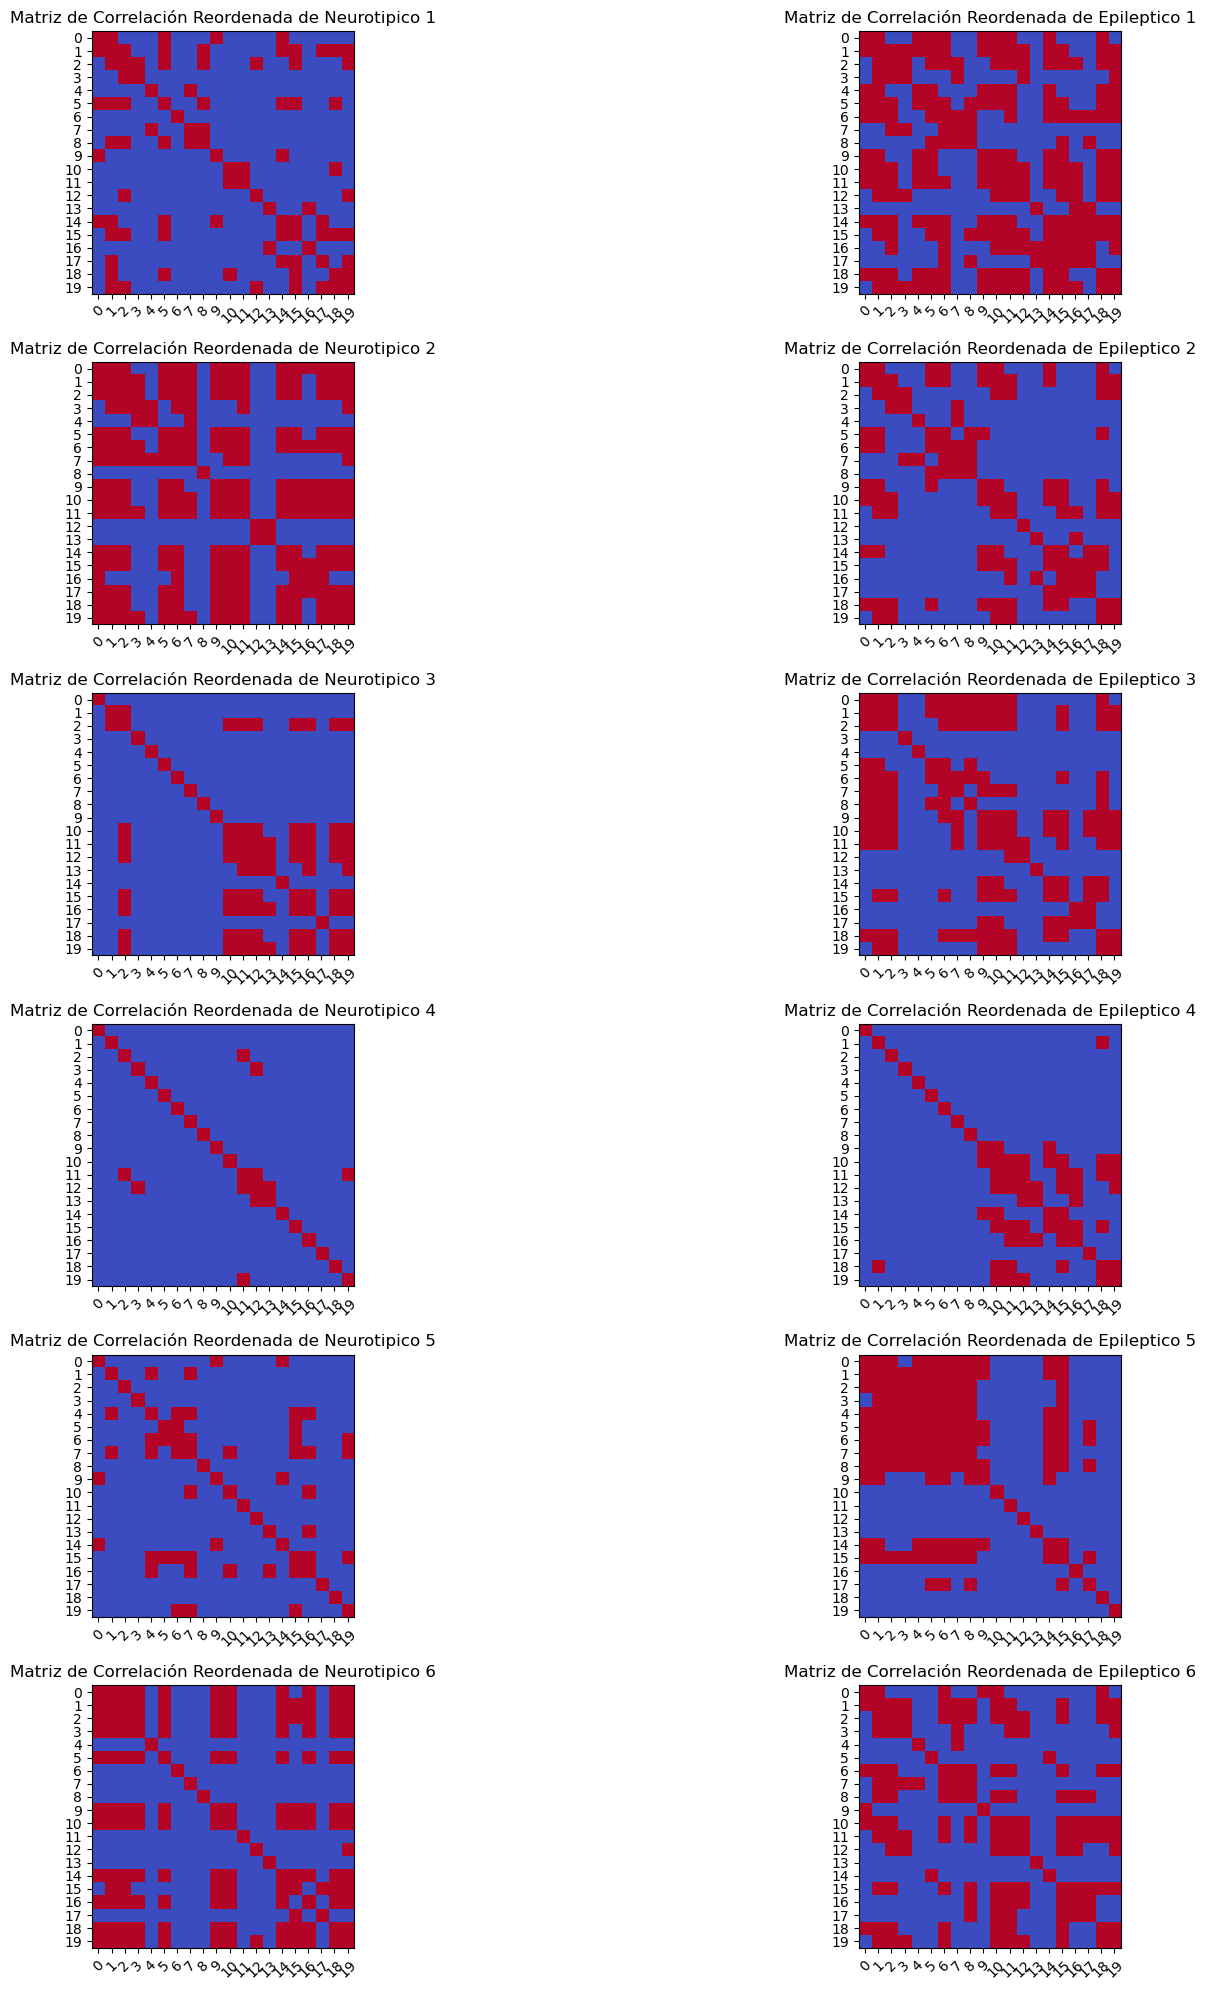

In [113]:
num_plots = len(matricesN)

fig, axes = plt.subplots(num_plots, 2, figsize=(20, 20))

for i in range(num_plots):

    ax1 = axes[i, 0]
    ax1.imshow(matricesN[i], cmap='coolwarm', interpolation='nearest')
    ax1.set_xticks(np.arange(len(matricesN[i].columns)))
    ax1.set_xticklabels(matricesN[i].columns, rotation=45)
    ax1.set_yticks(np.arange(len(matricesN[i].columns)))
    ax1.set_yticklabels(matricesN[i].columns)
    ax1.set_title(f'Matriz de Correlación Reordenada de Neurotipico {i+1}')

    ax2 = axes[i, 1]
    ax2.imshow(matricesE[i], cmap='coolwarm', interpolation='nearest')
    ax2.set_xticks(np.arange(len(matricesE[i].columns)))
    ax2.set_xticklabels(matricesE[i].columns, rotation=45)
    ax2.set_yticks(np.arange(len(matricesE[i].columns)))
    ax2.set_yticklabels(matricesE[i].columns)
    ax2.set_title(f'Matriz de Correlación Reordenada de Epileptico {i+1}')


plt.tight_layout()
plt.show()

In [114]:
betaArray = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


matricesN = []
matricesE = []

matrices_BetaN = []
matrices_BetaE = []

ventana = 100
salto = 1
lag = np.unique(np.logspace(6, 10, 11, base = 2).astype(int))
q = 2
order = 1
i = 0
beta = 0.6
fp = 30
fl = 0


Con = gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Epilepticos\*")
Sin =   gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Neurotipicos\*")

for t in range(6):
    for K in range(len(betaArray)):
        
        beta = betaArray[K]
        paciente = t

        n_canales, signal_labels, eventoC,Con_Epilepcia= leer_con_protocolo_monopolar(Con[paciente],fp,fl)
        n_canales, signal_labels, eventoS, Sin_Epilepcia= leer_con_protocolo_monopolar(Sin[paciente],fp,fl)



        nodes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

        df_Epilepticos = Hv_a_df(Con_Epilepcia,nodes)
        df_Neurotipicos = Hv_a_df(Sin_Epilepcia,nodes)

        corr_matrixE = df_Epilepticos.corr()
        corr_matrixN = df_Neurotipicos.corr()

    
        corr_matrixE_Binarizada = corr_matrixE.copy()


        for i in range(len(corr_matrixE[:][1])):
            for j in range(len(corr_matrixE[1][:])):
                if corr_matrixE[i][j] > beta:
                    corr_matrixE_Binarizada[i][j] = 1
                else:
                    corr_matrixE_Binarizada[i][j] = 0
                
                
            

        corr_matrixN_Binarizada = corr_matrixN.copy()


        for i in range(len(corr_matrixN[:][1])):
            for j in range(len(corr_matrixE[1][:])):
                if corr_matrixN[i][j] > beta:
                    corr_matrixN_Binarizada[i][j] = 1
                else:
                    corr_matrixN_Binarizada[i][j] = 0
            
        matrices_BetaN.append(corr_matrixN_Binarizada)
        matrices_BetaE.append(corr_matrixE_Binarizada)
       
        sys.stdout = sys.__stdout__
        
    matricesN.append(matrices_BetaN)
    matricesE.append(matrices_BetaE)
    matrices_BetaE = []
    matrices_BetaN = []

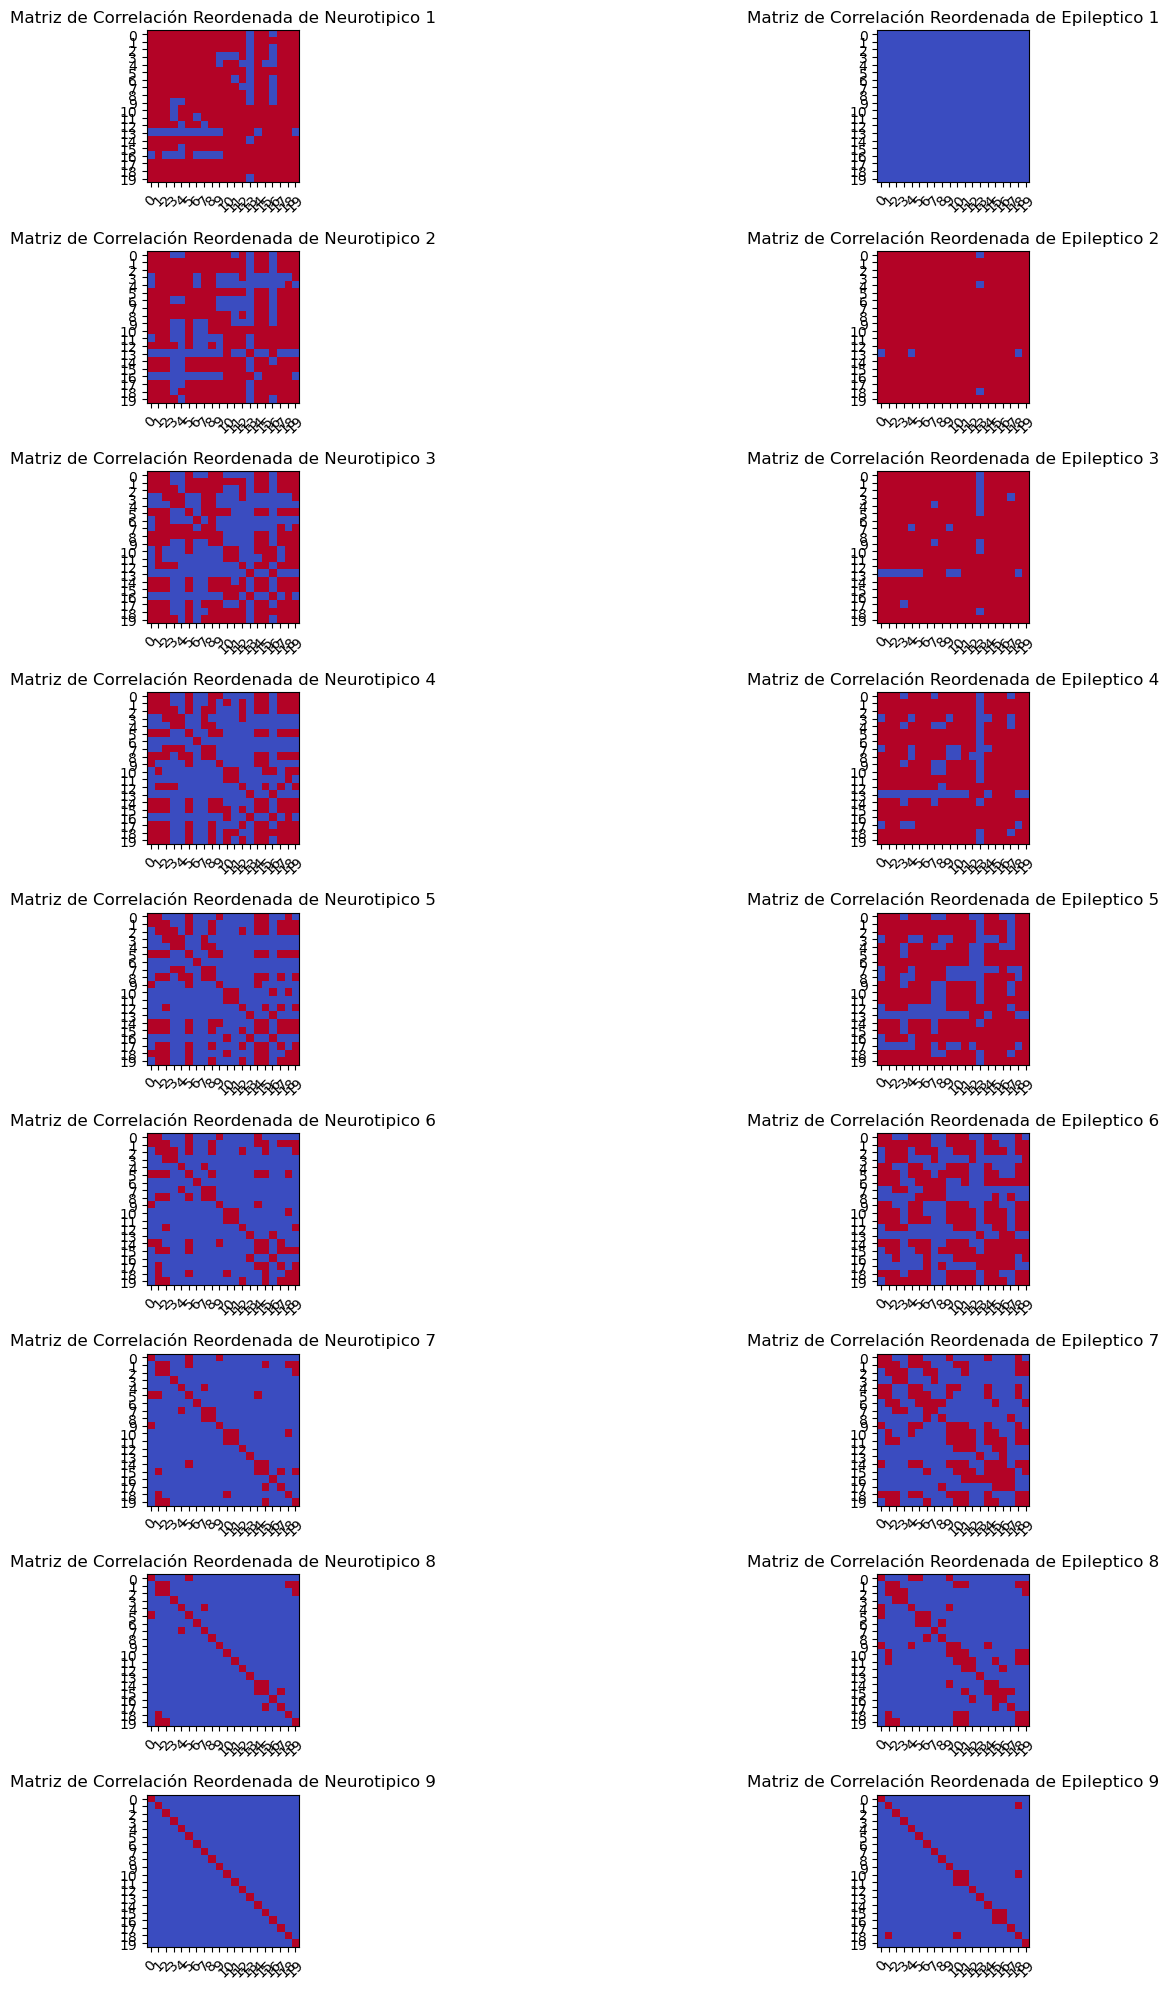

In [115]:
paciente = 0
fig, axes = plt.subplots(9, 2, figsize=(20, 20))
for i in range(len(betaArray)):

    ax1 = axes[i, 0]
    ax1.imshow(matricesN[paciente][i], cmap='coolwarm', interpolation='nearest')
    ax1.set_xticks(np.arange(len(matricesN[0][i].columns)))
    ax1.set_xticklabels(matricesN[paciente][i].columns, rotation=45)
    ax1.set_yticks(np.arange(len(matricesN[0][i].columns)))
    ax1.set_yticklabels(matricesN[paciente][i].columns)
    ax1.set_title(f'Matriz de Correlación Reordenada de Neurotipico {i+1}')

    ax2 = axes[i, 1]
    ax2.imshow(matricesE[paciente][i], cmap='coolwarm', interpolation='nearest')
    ax2.set_xticks(np.arange(len(matricesE[0][i].columns)))
    ax2.set_xticklabels(matricesE[paciente][i].columns, rotation=45)
    ax2.set_yticks(np.arange(len(matricesE[0][i].columns)))
    ax2.set_yticklabels(matricesE[paciente][i].columns)
    ax2.set_title(f'Matriz de Correlación Reordenada de Epileptico {i+1}')


plt.tight_layout()
plt.show()

In [116]:

paciente = 2


for g in range(len(betaArray)):
    
    graphN = nx.Graph()
    graphE = nx.Graph()
    
    corr_matrixN_Binarizada = matricesN[paciente][g]

    for node in corr_matrixN_Binarizada.columns:
        graphN.add_node(node)
        
    for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
        for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
            if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
                graphN.add_edge(node1, node2)
      
                

    corr_matrixE_Binarizada = matricesE[paciente][g]

    for node in corr_matrixE_Binarizada.columns:
        graphE.add_node(node)
        
    for i, node1 in enumerate(corr_matrixE_Binarizada.columns):
        for j, node2 in enumerate(corr_matrixE_Binarizada.columns):
            if i != j and corr_matrixE_Binarizada[i][j] == 1.0:
                graphE.add_edge(node1, node2)


    plt.figure(figsize=(8, 6))


    degree_sequenceN = [graphN.degree(node) for node in graphN.nodes()]

    degree_countsN = np.array(nx.degree_histogram(graphN))
    degree_countsE = np.array(nx.degree_histogram(graphE))

    x = range(len(degree_countsN))

    hist = go.Figure()
    hist.add_trace(go.Bar(x=list(range(len(degree_countsN))), y=degree_countsN, name= 'Neurotipicos', marker=dict(color='blue')))
    hist.add_trace(go.Bar(x=list(range(len(degree_countsE))), y=degree_countsE, name= 'Epilepticos',  marker=dict(color='red') ))

    estetica(hist,title = f'Distribucion de grado para Beta = {betaArray[g]}', h=300,w=700)
    hist.show()
    


    

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [117]:

for g in range(len(betaArray)):
    hist = go.Figure()
    for paciente in range(5):    
        
        graphN = nx.Graph()
        graphE = nx.Graph()
        
        corr_matrixN_Binarizada = matricesN[paciente][g]

        for node in corr_matrixN_Binarizada.columns:
            graphN.add_node(node)
            
        for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
            for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
                if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
                    graphN.add_edge(node1, node2)
        
                    

        corr_matrixE_Binarizada = matricesE[paciente][g]

        for node in corr_matrixE_Binarizada.columns:
            graphE.add_node(node)
            
        for i, node1 in enumerate(corr_matrixE_Binarizada.columns):
            for j, node2 in enumerate(corr_matrixE_Binarizada.columns):
                if i != j and corr_matrixE_Binarizada[i][j] == 1.0:
                    graphE.add_edge(node1, node2)


        plt.figure(figsize=(8, 6))


        degree_sequenceN = [graphN.degree(node) for node in graphN.nodes()]

        degree_countsN = np.array(nx.degree_histogram(graphN))
        degree_countsE = np.array(nx.degree_histogram(graphE))

        x = range(len(degree_countsN))

        
        hist.add_trace(go.Bar(x=list(range(len(degree_countsN))), y=degree_countsN, name= 'Neurotipicos', marker=dict(color='blue',line=dict(width=0.2))))
        hist.add_trace(go.Bar(x=list(range(len(degree_countsE))), y=degree_countsE, name= 'Epilepticos',  marker=dict(color='red',line=dict(width=0.2)) ))
        hist.update_layout(showlegend=False)
    estetica(hist,title = f'Distribucion de grado para Beta = {betaArray[g]}', h=300,w=700)
    hist.show()



    

C:\Users\valen\AppData\Local\Temp\ipykernel_3380\3823701601.py:31: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Matriz de Correlación Reordenada de Neurotipico')

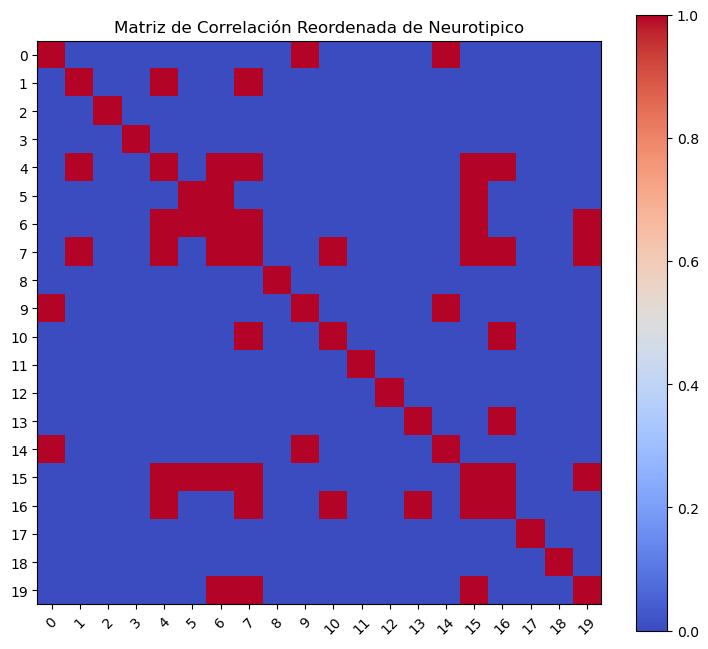

In [118]:
plt.figure(figsize=(20, 8))
i=4
plt.subplot(1,2,1)
plt.imshow(matricesN[i][5], cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(matricesE[i][5].columns)), matricesE[0][5].columns, rotation=45)
plt.yticks(np.arange(len(matricesE[i][5].columns)), matricesE[0][5].columns)
plt.title('Matriz de Correlación Reordenada de Neurotipico')

In [119]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go


fig = go.Figure()

fig.add_scatter(x=df['X'], y=df['P'], name='Ticket Volume Received', mode='lines+markers', line=dict(width=3),marker=dict(symbol='diamond',size=10))
fig.add_scatter(x=df['X'], y=df['S'], name='Ticket Volume Processed', mode='lines+markers',line=dict(width=3),marker=dict(symbol='square',size=10) )


estetica(fig, h=450,w=800)
fig.show()

NameError: name 'df' is not defined

In [120]:
paciente = 0

beta = 0
graphSoloN = nx.Graph()


corr_matrixN_Binarizada = matricesN[paciente][beta]

for node in corr_matrixN_Binarizada.columns:
    graphSoloN.add_node(node)
    
for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
    for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
        if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
            graphSoloN.add_edge(node1, node2)
            

degree_countsN = nx.degree_histogram(graphSoloN)


graphSoloE = nx.Graph()
corr_matrixE_Binarizada = matricesE[paciente][beta]

for node in corr_matrixE_Binarizada.columns:
    graphSoloE.add_node(node)
    
for i, node1 in enumerate(corr_matrixE_Binarizada.columns):
    for j, node2 in enumerate(corr_matrixE_Binarizada.columns):
        if i != j and corr_matrixE_Binarizada[i][j] == 1.0:
            graphSoloE.add_edge(node1, node2)
            
           


degree_countsE = nx.degree_histogram(graphSoloE)




hist = go.Figure()
hist.add_trace(go.Bar(x=list(range(len(degree_countsN))), y=degree_countsN, name= 'Neurotipicos'))
hist.add_trace(go.Bar(x=list(range(len(degree_countsE))), y=degree_countsE, name= 'Epilepticos' ))

estetica(hist,title = f'Distribucion de grado para Beta = {betaArray[g]}', h=300,w=700)
hist.show()
         

In [126]:
coeficiente_clusteringEArray = []
coeficiente_clusteringNArray = []
E = []
N = []

for paciente in range(6):
    coeficiente_clusteringEArray = []
    coeficiente_clusteringNArray = []
    for g in range(9):    
        
        graphN = nx.Graph()
        graphE = nx.Graph()
        
        corr_matrixN_Binarizada = matricesN[paciente][g]

        for node in corr_matrixN_Binarizada.columns:
            graphN.add_node(node)
            
        for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
            for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
                if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
                    graphN.add_edge(node1, node2)
        
                    

        corr_matrixE_Binarizada = matricesE[paciente][g]

        for node in corr_matrixE_Binarizada.columns:
            graphE.add_node(node)
            
        for i, node1 in enumerate(corr_matrixE_Binarizada.columns):
            for j, node2 in enumerate(corr_matrixE_Binarizada.columns):
                if i != j and corr_matrixE_Binarizada[i][j] == 1.0:
                    graphE.add_edge(node1, node2)

        
        coeficiente_clusteringEArray.append(nx.average_clustering(graphE))
        coeficiente_clusteringNArray.append(nx.average_clustering(graphN))
    E.append(coeficiente_clusteringEArray)
    N.append(coeficiente_clusteringNArray)




In [122]:
fig = go.Figure()
for i in range(len(E)):
    

    fig.add_scatter(x=betaArray, y=E[i], mode='lines+markers', line=dict(width=3),marker=dict(symbol='diamond',size=10, color = "red"),showlegend=False)
    fig.add_scatter(x=betaArray, y=N[i], mode='lines+markers', line=dict(width=3),marker=dict(symbol='square',size=10, color = "blue"),showlegend=False)
estetica(fig, h=450,w=800,x_name='Umbral',y_name='Coef Clustering',title="Coef de clustering para diferentes pacientes")
fig.show()

In [123]:
componentes_conectados = list(nx.connected_components(grafo))

componente_mas_grande = max(componentes_conectados, key=len)

grafo_conectado = grafo.subgraph(componente_mas_grande)

longitud_red = nx.average_shortest_path_length(grafo_conectado)

longitud_red

2.4044117647058822

In [189]:
GradoPromEArray = []
GradoPromNArray = []
EL = []
NL = []

for paciente in range(6):
    GradoPromEArray = []
    GradoPromNArray = []
    for g in range(9):    
        
        graphN = nx.Graph()
        graphE = nx.Graph()
        
        corr_matrixN_Binarizada = matricesN[paciente][g]

        for node in corr_matrixN_Binarizada.columns:
            graphN.add_node(node)
            
        for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
            for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
                if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
                    graphN.add_edge(node1, node2)
        
                    

        corr_matrixE_Binarizada = matricesE[paciente][g]

        for node in corr_matrixE_Binarizada.columns:
            graphE.add_node(node)
            
        for i, node1 in enumerate(corr_matrixE_Binarizada.columns):
            for j, node2 in enumerate(corr_matrixE_Binarizada.columns):
                if i != j and corr_matrixE_Binarizada[i][j] == 1.0:
                    graphE.add_edge(node1, node2)

        gradosE = graphE.degree()
        suma_gradosE = sum(dict(gradosE).values())
        grado_promedioE = suma_gradosE / graphE.number_of_nodes()
        

        gradosN = graphN.degree()
        suma_gradosN = sum(dict(gradosN).values())
        grado_promedioN = suma_gradosN / graphN.number_of_nodes()        
        
        GradoPromEArray.append(grado_promedioE)
        GradoPromNArray.append(grado_promedioN)
        
        
    EL.append(GradoPromEArray)
    NL.append(GradoPromNArray)


In [187]:
grado_promedioE

18

In [190]:
fig = go.Figure()
for i in range(len(EL)):
    

    fig.add_scatter(x=betaArray, y=EL[i], mode='lines+markers', line=dict(width=3),marker=dict(symbol='diamond',size=10, color = "red"),showlegend=False)
    fig.add_scatter(x=betaArray, y=NL[i], mode='lines+markers', line=dict(width=3),marker=dict(symbol='square',size=10, color = "blue"),showlegend=False)
estetica(fig, h=450,w=800,x_name='Umbral',y_name='Coef Clustering',title="Coef de clustering para diferentes pacientes")
fig.show()

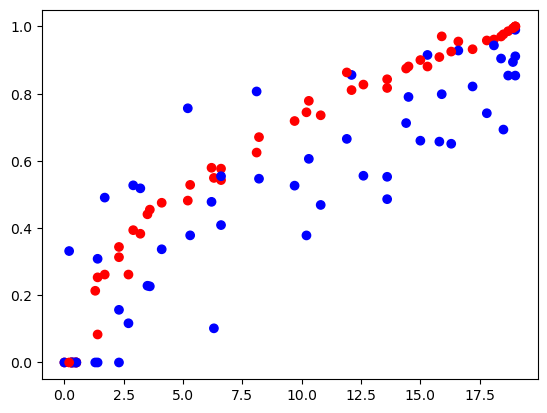

In [213]:
for i in range(len(EL)):
    XE = pd.Series(EL[i])
    YE = pd.Series(E[i])
    XN = pd.Series(NL[i])
    YN = pd.Series(N[i])



    X = pd.DataFrame({'color':'r','target':'A','x':XE,'y':YE})
    Y = pd.DataFrame({'color':'b','target':'A','x':XE,'y':YN})

    Dataset = pd.concat([X,Y],ignore_index= True,axis=0)

    plt.scatter(Dataset['x'],Dataset['y'], c= Dataset['color'])

In [199]:
from mpl_toolkits.mplot3d import Axes3D

,color,target,x,y
0,r,A,"[19.0, 18.7, 17.8, 15.8, 13.6, 10.2, 6.3, 2.7,...","[1.0, 0.9859649122807015, 0.9583677330581356, ..."
1,r,A,"[19.0, 18.1, 15.3, 12.1, 8.1, 5.2, 2.9, 1.4, 0.3]","[1.0, 0.9612058095842926, 0.880860367272906, 0..."
2,r,A,"[16.6, 15.9, 15.0, 13.6, 10.8, 6.6, 4.1, 2.3, ...","[0.9552287581699346, 0.9705882352941178, 0.900..."
3,r,A,"[18.4, 14.5, 8.2, 5.3, 3.6, 2.3, 1.4, 0.3, 0.0]","[0.9701973684210528, 0.8810846695444221, 0.670..."
4,r,A,"[19.0, 18.5, 16.3, 12.6, 9.7, 6.2, 3.5, 1.3, 0.5]","[1.0, 0.9767629858961125, 0.9253246474028207, ..."
5,r,A,"[18.9, 17.2, 14.4, 11.9, 10.3, 6.6, 3.2, 1.7, ...","[0.994736842105263, 0.9322968521846231, 0.8748..."


In [ ]:

componentes_conectadosN = list(nx.connected_components(grafo))
componente_mas_grandeN = max(componentes_conectadosN, key=len)
grafo_conectadoN = grafo.subgraph(componente_mas_grandeN)
longitud_redN = nx.average_shortest_path_length(grafo_conectadoN)

In [157]:
nodos_desconectados = list(nx.isolates(graphN))
graphN.remove_nodes_from(nodos_desconectados)
longitud_redN = nx.average_shortest_path_length(graphN)

NetworkXError: Graph is not connected.

In [158]:
nodos_desconectados

[]

In [125]:
paciente=0
g = 5
graphN = nx.Graph()


corr_matrixN_Binarizada = matricesN[paciente][g]

for node in corr_matrixN_Binarizada.columns:
    graphN.add_node(node)
    
for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
    for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
        if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
            graphN.add_edge(node1, node2)

     
componentes_conectadosN = list(nx.connected_components(graphN))
componente_mas_grandeN = max(componentes_conectadosN, key=len)
grafo_conectadoN = grafo.subgraph(componente_mas_grandeN)
longitud_redN = nx.average_shortest_path_length(grafo_conectadoN)

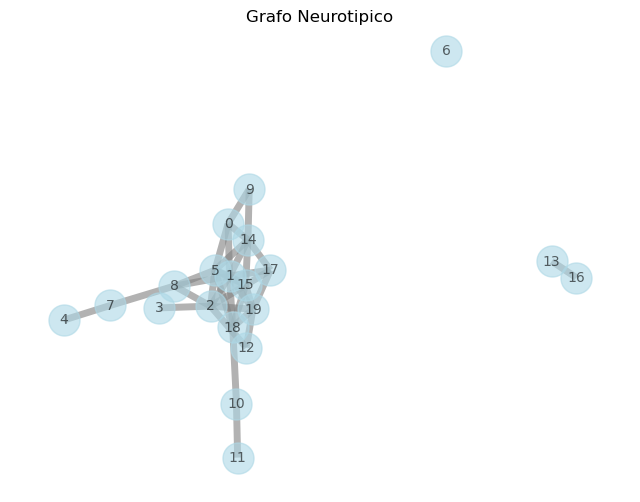

In [159]:
import pandas as pd
import numpy as np
import networkx as nx


coeficiente_clusteringEArray = []
coeficiente_clusteringNArray = []
EL = []
NL = []

coeficiente_clusteringEArray = []
coeficiente_clusteringNArray = []

graphN = nx.Graph()
graphE = nx.Graph()



corr_matrixN_Binarizada = matricesN[paciente][g]


for node in corr_matrixN_Binarizada.columns:
    graphN.add_node(node)
    
for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
    for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
        if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
            graphN.add_edge(node1, node2)
        


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graphN)
nx.draw_networkx(graphN, pos, with_labels=True, node_size=500, node_color='lightblue',
                 font_size=10, font_color='black', edge_color='gray', width=5, alpha=0.6)
# labels = nx.get_edge_attributes(graphN, 'weight')



plt.title('Grafo Neurotipico')
plt.axis('off')
plt.show()

In [161]:

nodos_desconectados = list(nx.isolates(graphN))
graphN.remove_nodes_from(nodos_desconectados)

In [165]:
list(nx.isolates(graphN))

[]

In [153]:

longitud_redN = nx.average_shortest_path_length(graphN)

In [154]:
longitud_redN

2.272727272727273